# Bayesian Optimization

According to Wikipedia "Bayesian optimization is a sequential design strategy for global optimization of black-box functions that doesn't require derivatives."

We call this black-box function the **objective function**. We also use a **surrogate function** to estimate the objective function. The surrogate function consumes known points calculated by objective function and fit mean and standard deviation of the objective function. The output is then used by the **acquisition function** in searching for the next sample to exploit or explore.

The trinity is demonstrated as follow:

![Bayesian Optimization Process](bayesian_optimization/bayesian_optimization_process.png)

We do all of this inside the **search space**.

The whole process:

0. Initiate x with the min and max of the search space.
1. Calculate y using x and objective function.
2. Fit the surrogate function.
3. Find new x using acquisition function.
4. Goto 1

The surrogate function is usually the gussian process, and this is also what we use here.

The acquisition function has several options: 

1. Probability of Improvement (PI).
2. Expected Improvement (EI).
3. Upper/Lower Confidence Bound (LCB/UCB).

Here we use UCB.

$$UCB(x;\beta) =\mu(x) + \beta\sigma(x)$$

We set $\beta=1$. Thus the acquisition function is:

$$UCB(x) =\mu(x) + \sigma(x)$$

$$x=\underset{x\in X}{\operatorname{argmax}}UCB(x)$$

In [1]:
# example of a gaussian process surrogate function
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

Let's first define the trinity here:

In [2]:
# objective function
def objective(x):
    return ((x-0.47)**2 * math.sin(3 * x))

#uppper confidence bound (UCB)
#beta = 1
def acquisition(mean, std):
    mean=mean.flatten()

    #UCB
    upper=mean+std
    #argmax
    max_at=np.argmax(upper)
    return X[max_at]

#surrogate
surrogate = GaussianProcessRegressor()

We also need a plot function to present the result. Don't bother yourself with the plot function. Focus on what matters.

In [3]:
def plot(X, y, xsamples, ysamples, mean, std, new_x, new_y, i):
    mean=mean.reshape(-1,1)
    std=std.reshape(-1,1)
    plt.figure(figsize=(12,6))
    plt.plot(X, y, label='objective')
    
    plt.scatter(xsamples, ysamples, label='explored samples')
    plt.plot(X, mean, label='surrogate - mean', c='g')
    plt.plot(X, mean+std, label='surrogate - upper/lower bound',c='g',linestyle='--',)
    plt.plot(X, mean-std, c='g',linestyle='--',)
    plt.scatter([new_x], [new_y], label='next sample(acquisition)', c='r')
    plt.legend()
    plt.title(f'Iteration {i}')
    plt.show()

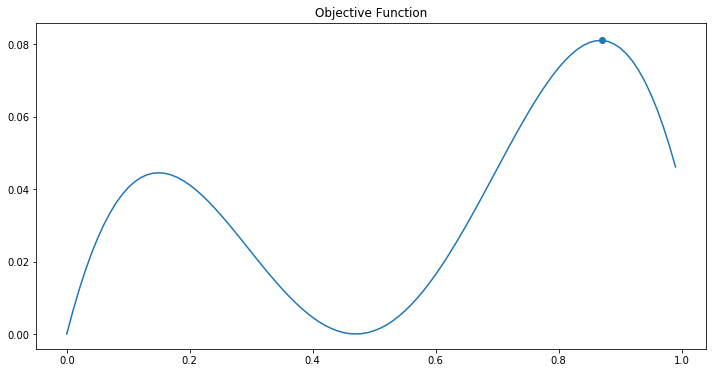

In [4]:
# search space [0,1]
X = np.arange(0, 1, 0.01)
X = X.reshape(-1,1)
# calculate y
y = np.array([objective(x) for x in X])
y = y.reshape(-1,1)
# find best result by grid search
ix = np.argmax(y)

plt.figure(figsize=(12,6))
plt.plot(X, y)
plt.scatter(X[ix],y[ix])
#plt.annotate(f'Optima {(X[ix], y[ix])}',(X[ix], y[ix]))
plt.title('Objective Function')
plt.show()

The following is the process:

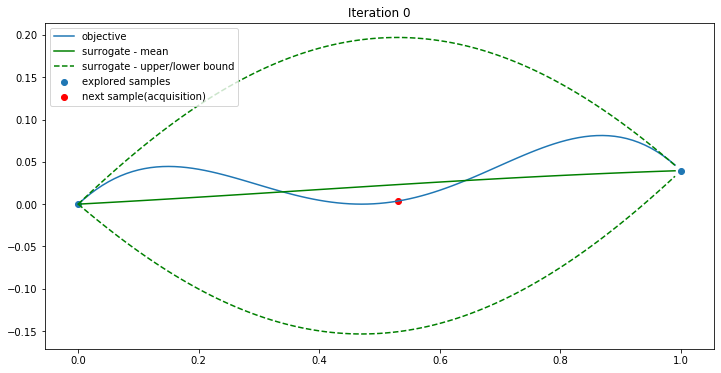

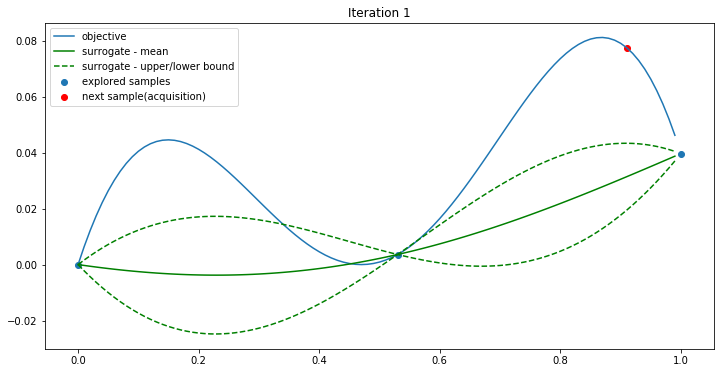

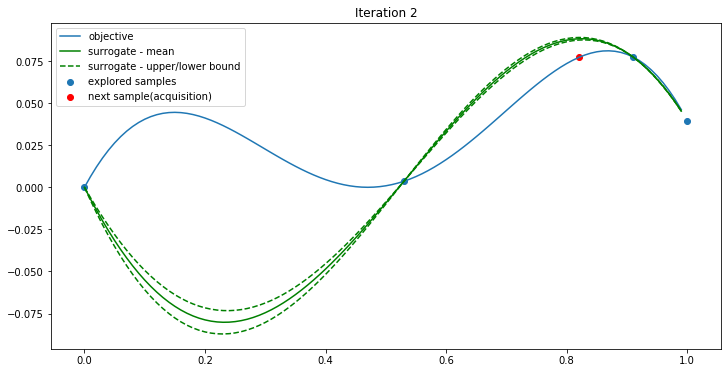

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


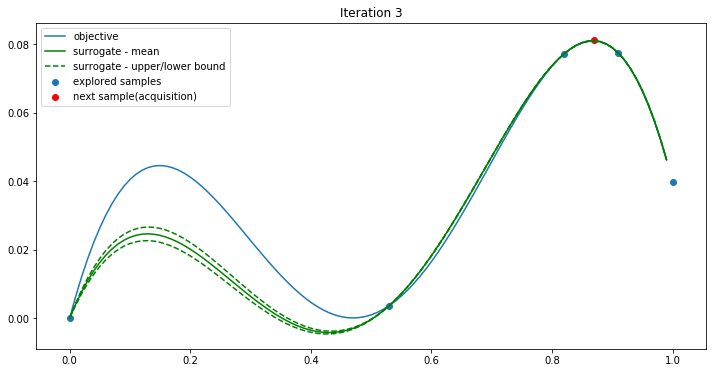

In [5]:
#step 0 Initiate x with the min and max of the search space.
xsamples=np.array([[0],[1]])

#step 1 Calculate y using x and objective function.
ysamples=np.array([objective(x) for x in xsamples])

for i in range(4):
    #step 2 Fit the surrogate function.
    surrogate.fit(xsamples, ysamples)
    mean, std=surrogate.predict(X, return_std=True)
    
    #step 3 Find new x using acquisition function.
    new_x=acquisition(mean, std)
    
    #step 4 Go to 1
    new_y=objective(new_x)

    #plot
    plot(X, y, xsamples, ysamples, mean, std, new_x, new_y, i)
    xsamples=np.vstack((xsamples, new_x))
    ysamples=np.vstack((ysamples, new_y))
    

In [6]:
#report the result
max_at=np.argmax(ysamples)
print(max_at, xsamples[max_at], ysamples[max_at])

5 [0.87] [0.0811051]


# Bayesian Optimization using Hyperopt

The above code is only used to demonstate the algorithm. In daily work, we use tools like Hyperopt.

In [7]:
from hyperopt import fmin, tpe, hp
best = fmin(
    fn=lambda x:-objective(x),
    space=hp.uniform('x', 0, 1),
    algo=tpe.suggest,
    max_evals=100)
print(best)

100%|███████████████████████████████████████████| 100/100 [00:00<00:00, 516.72trial/s, best loss: -0.08111389219843222]
{'x': 0.8679944307847185}


In [8]:
objective(0.8677763535516424)

0.08111392201180685